In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Xiang Meng/Desktop/archive (1)/aug_train.csv')
df = df.loc[:, [x for x in df.columns if x not in ['enrollee_id', 'city']]]

In [3]:
print(len(df)) #19158
for i in df.columns:
    print(i +': ')
    print(df[i].unique())

19158
city_development_index: 
[0.92  0.776 0.624 0.789 0.767 0.764 0.762 0.913 0.926 0.827 0.843 0.804
 0.855 0.887 0.91  0.884 0.924 0.666 0.558 0.923 0.794 0.754 0.939 0.55
 0.865 0.698 0.893 0.796 0.866 0.682 0.802 0.579 0.878 0.897 0.949 0.925
 0.896 0.836 0.693 0.769 0.775 0.903 0.555 0.727 0.64  0.516 0.743 0.899
 0.915 0.689 0.895 0.89  0.847 0.527 0.766 0.738 0.647 0.795 0.74  0.701
 0.493 0.84  0.691 0.735 0.742 0.479 0.722 0.921 0.848 0.856 0.898 0.83
 0.73  0.68  0.725 0.556 0.448 0.763 0.745 0.645 0.788 0.78  0.512 0.739
 0.563 0.518 0.824 0.487 0.649 0.781 0.625 0.807 0.664]
gender: 
['Male' nan 'Female' 'Other']
relevent_experience: 
['Has relevent experience' 'No relevent experience']
enrolled_university: 
['no_enrollment' 'Full time course' nan 'Part time course']
education_level: 
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline: 
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience: 
['>20' '15' '5' '<1' '11

In [4]:
df.isna().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

## since "education_level","enrolled_university","experience","last_new_job", "major_discipline" have relatively small number of null value, we decide to drop it directly

In [5]:

df.dropna(subset=["education_level","enrolled_university","experience","last_new_job","major_discipline"],inplace = True)

In [6]:
len(df)

15792

In [7]:
df.isna().sum()

city_development_index       0
gender                    3315
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              3993
company_type              4232
last_new_job                 0
training_hours               0
target                       0
dtype: int64

## replace null in "gender" with "Other"

In [8]:
df.gender = df.gender.fillna('Other')

## deal with company_size & company_type
## fill in with mode

In [9]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              3993
company_type              4232
last_new_job                 0
training_hours               0
target                       0
dtype: int64

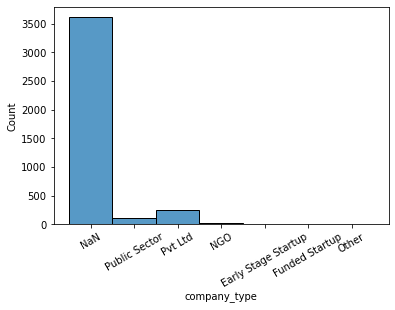

In [10]:
sns.histplot(df.loc[df.company_size.isna(), 'company_type'].replace(np.nan, 'NaN')) 
#those two columns are correlated
#5000 of data points are null in both of the columns
    
plt.xticks(rotation=30)
plt.show()

In [11]:
print(df.company_type.mode())
print(df.company_size.mode())

0    Pvt Ltd
dtype: object
0    50-99
dtype: object


C:\Users\Xiang Meng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


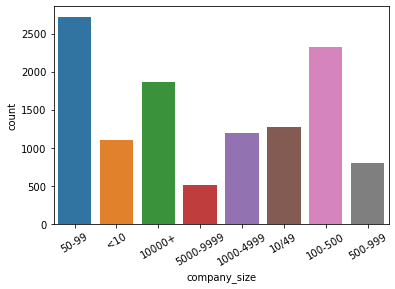

In [12]:
sns.countplot(df.company_size)
plt.xticks(rotation=30)
plt.show()

In [13]:
df["company_type"].fillna(df["company_type"].mode()[0],inplace=True)
df["company_size"].fillna(df["company_size"].mode()[0],inplace=True)


## deal with experience column
## cut experience into 5 levels
## 0-4, 5-10, 11-14, 15-19, >20

C:\Users\Xiang Meng\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


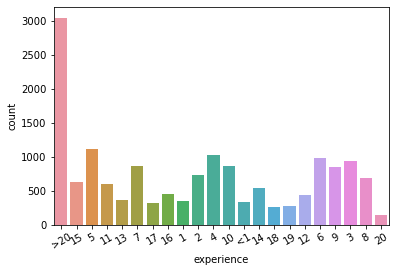

In [14]:
sns.countplot(df.experience)
plt.xticks(rotation=30)
plt.show()

In [15]:
def cut_exp(x):
    if x in ['<1','1','2','3','4']: return 1
    elif x in [str(i) for i in range(5, 10)]: return 2
    elif x in [str(i) for i in range(10, 15)]: return 3
    elif x in [str(i) for i in range(15, 20)]: return 4
    else: return 5

df['cut_exp'] = df['experience'].apply(cut_exp)

In [16]:
df1 = df.copy()
df1[['cut_exp']] = df1[['cut_exp']].astype('object')
df1 = df1.loc[:, [x for x in df1.columns if x != 'experience']]
df1 = pd.get_dummies(df1, drop_first = True)
df1.columns

Index(['city_development_index', 'training_hours', 'target', 'gender_Male',
       'gender_Other', 'relevent_experience_No relevent experience',
       'enrolled_university_Part time course',
       'enrolled_university_no_enrollment', 'education_level_Masters',
       'education_level_Phd', 'major_discipline_Business Degree',
       'major_discipline_Humanities', 'major_discipline_No Major',
       'major_discipline_Other', 'major_discipline_STEM',
       'company_size_100-500', 'company_size_1000-4999', 'company_size_10000+',
       'company_size_50-99', 'company_size_500-999', 'company_size_5000-9999',
       'company_size_<10', 'company_type_Funded Startup', 'company_type_NGO',
       'company_type_Other', 'company_type_Public Sector',
       'company_type_Pvt Ltd', 'last_new_job_2', 'last_new_job_3',
       'last_new_job_4', 'last_new_job_>4', 'last_new_job_never', 'cut_exp_2',
       'cut_exp_3', 'cut_exp_4', 'cut_exp_5'],
      dtype='object')

## balance the data

In [17]:
X = df1.drop('target', axis=1)
y = df1.target
print(len(y), sum(y))

15792 4004.0


In [18]:
from sklearn.utils import resample

X_resampled, y_resampled = resample(X[y==0], y[y==0], replace=False, n_samples=X[y==1].shape[0], random_state=42)

In [19]:
X = np.vstack((X_resampled, X[y==1]))
y = np.hstack((y_resampled, y[y==1]))

In [20]:
print(len(y), y.sum())

8008 4004.0


In [45]:
df1

,city_development_index,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Masters,education_level_Phd,...,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,cut_exp_2,cut_exp_3,cut_exp_4,cut_exp_5
0,0.920,36,1.0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.776,47,0.0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0.624,83,0.0,0,1,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,0.767,8,0.0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
5,0.764,24,1.0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19150,0.920,23,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
19152,0.920,25,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
19153,0.878,42,1.0,1,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
19154,0.920,52,1.0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [44]:
print(X)
print(y)

[[ 0.767 54.     1.    ...  0.     0.     0.   ]
 [ 0.92  36.     1.    ...  0.     0.     1.   ]
 [ 0.624 78.     1.    ...  0.     0.     0.   ]
 ...
 [ 0.92  36.     1.    ...  0.     0.     0.   ]
 [ 0.878 42.     1.    ...  1.     0.     0.   ]
 [ 0.92  52.     1.    ...  1.     0.     0.   ]]
[0. 0. 0. ... 1. 1. 1.]


In [65]:
import seaborn as sns
from matplotlib import pyplot as plt
corrmatrix = df1.corr()
#plt.figure(figsize=(12,8))
#plot = sns.heatmap(df1[corrmatrix.index].corr(), annot = False)

# 

# 

# MODELLING

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [22]:
print(X.shape[1], len([x for x in df1.columns if x != 'target']))

35 35


In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True, random_state=42)

In [24]:
pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [25]:
param_grid = {
    'knn__n_neighbors':range(20, 80, 2),
    'knn__weights': ['uniform', 'distance']
}

In [26]:
gs_knn = GridSearchCV(pipe_knn, 
                     param_grid = param_grid,
                     cv=5,
                     scoring = 'accuracy',
                     verbose=1,
                     n_jobs=-1
                     )

In [27]:
gs_knn.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(20, 80, 2),
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [28]:
gs_knn.best_score_, gs_knn.best_params_

(0.6795702748204345, {'knn__n_neighbors': 26, 'knn__weights': 'uniform'})

In [29]:
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000, random_state=42))])

In [30]:
param_grid = {
    'lr__C':10.0**np.arange(-5, 6, 1),
    'lr__penalty': ['l1','l2']
}

In [31]:
gs_lr = GridSearchCV(pipe_lr, 
                     param_grid = param_grid,
                     cv=5,
                     scoring = 'accuracy',
                     verbose=1,
                     n_jobs=-1
                     )

In [32]:
gs_lr.fit(X, y)

Fitting 5 folds for each of 22 candidates, totalling 110 fits


C:\Users\Xiang Meng\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.68593786        nan 0.69243201        nan 0.70329632
        nan 0.70491937        nan 0.70367069        nan 0.70429491
        nan 0.70429491        nan 0.70429491        nan 0.70429491
        nan 0.70429491        nan 0.70429491]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'lr__penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [33]:
gs_lr.best_score_, gs_lr.best_params_

(0.7049193660953165, {'lr__C': 0.01, 'lr__penalty': 'l2'})

In [67]:
pipe_dt = Pipeline([('scaler', StandardScaler()), ('dt', DecisionTreeClassifier(random_state=42))])
param_grid = {
    'dt__max_depth':np.arange(5, 20),
    'dt__min_samples_split': [2,3,4,5,6,7,8,9,10],
    'dt__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
}

In [56]:
gs_dt = GridSearchCV(pipe_dt, 
                     param_grid = param_grid,
                     cv=5,
                     scoring = 'accuracy',
                     verbose=1,
                     n_jobs=-1
                     )

In [57]:
gs_dt.fit(X,y)

Fitting 5 folds for each of 1350 candidates, totalling 6750 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'dt__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                  10],
                         'dt__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy', verbose=1)

In [58]:
gs_dt.best_score_, gs_dt.best_params_

(0.7437554243953335,
 {'dt__max_depth': 6, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 7})

In [59]:
gs_dt.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=3,
                                        min_samples_split=7,
                                        random_state=42))])

In [60]:
knn_clf = gs_knn.best_estimator_
lr_clf = gs_lr.best_estimator_
dt_clf = gs_dt.best_estimator_

In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score


clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [lr_clf, dt_clf, knn_clf]

#################################### Cross - Validation ####################################


print('5-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip(all_clf, clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=5,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

ROC AUC: 0.76 (+/- 0.00) [Logistic regression]
ROC AUC: 0.78 (+/- 0.00) [Decision tree]
ROC AUC: 0.73 (+/- 0.01) [kNN]


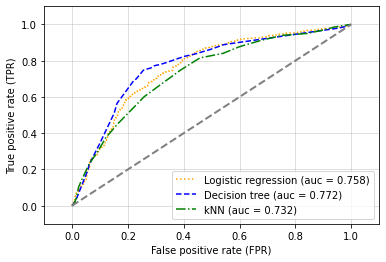

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix
import itertools
dt_pred = dt_clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, dt_pred)

In [75]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.71691176 0.28308824]
 [0.23918575 0.76081425]]


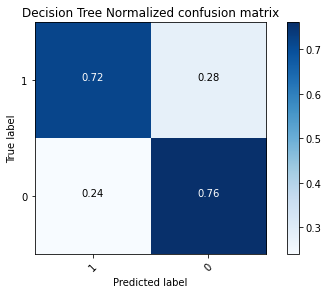

In [78]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,0], normalize=True,
                      title='Decision Tree Normalized confusion matrix')

plt.show()